In [38]:
# Installations
!pip install xgboost
!pip install scikit-plot

# General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from scipy import stats
import random

# Metric imports
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Visualization Imports
import graphviz 
from sklearn import tree

# Model Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Load in dataset to pandas DataFrame
dataset = pd.read_csv("https://github.com/SBodapati11/Tree-Classification/blob/main/Bank%20Customer%20Churn%20Prediction.csv?raw=true")

In [3]:
# Check for any missing values
sum(dataset.isna().sum())

0

In [4]:
# Check for any null values
sum(dataset.isnull().sum())

0

In [5]:
# Find the statistics of the dataset
dataset.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
dataset.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Variables and their meaning
# customer_id - an identification number for the customer (not used)
# credit_score - the customer's credit score
# country - the location the customer's account originated from (France, Germany, or Spain)
# gender - the customer's gender (Male or Female)
# age - the customer's age
# tenure - how long the customer's account has been active for
# balance - the current balance of the customer's account
# products_number - number of products the customer has bought from the bank
# credit_card - whether the customer owns a credit card from the bank (1=yes, 0=no)
# active_member - whether the customer is an active member (1=yes, 0=no)
# estimated_salary - the estimated salary of the customer
# churn - whether the customer has left the bank during some period (1=yes, 0=no) (This is what we are trying to predict)

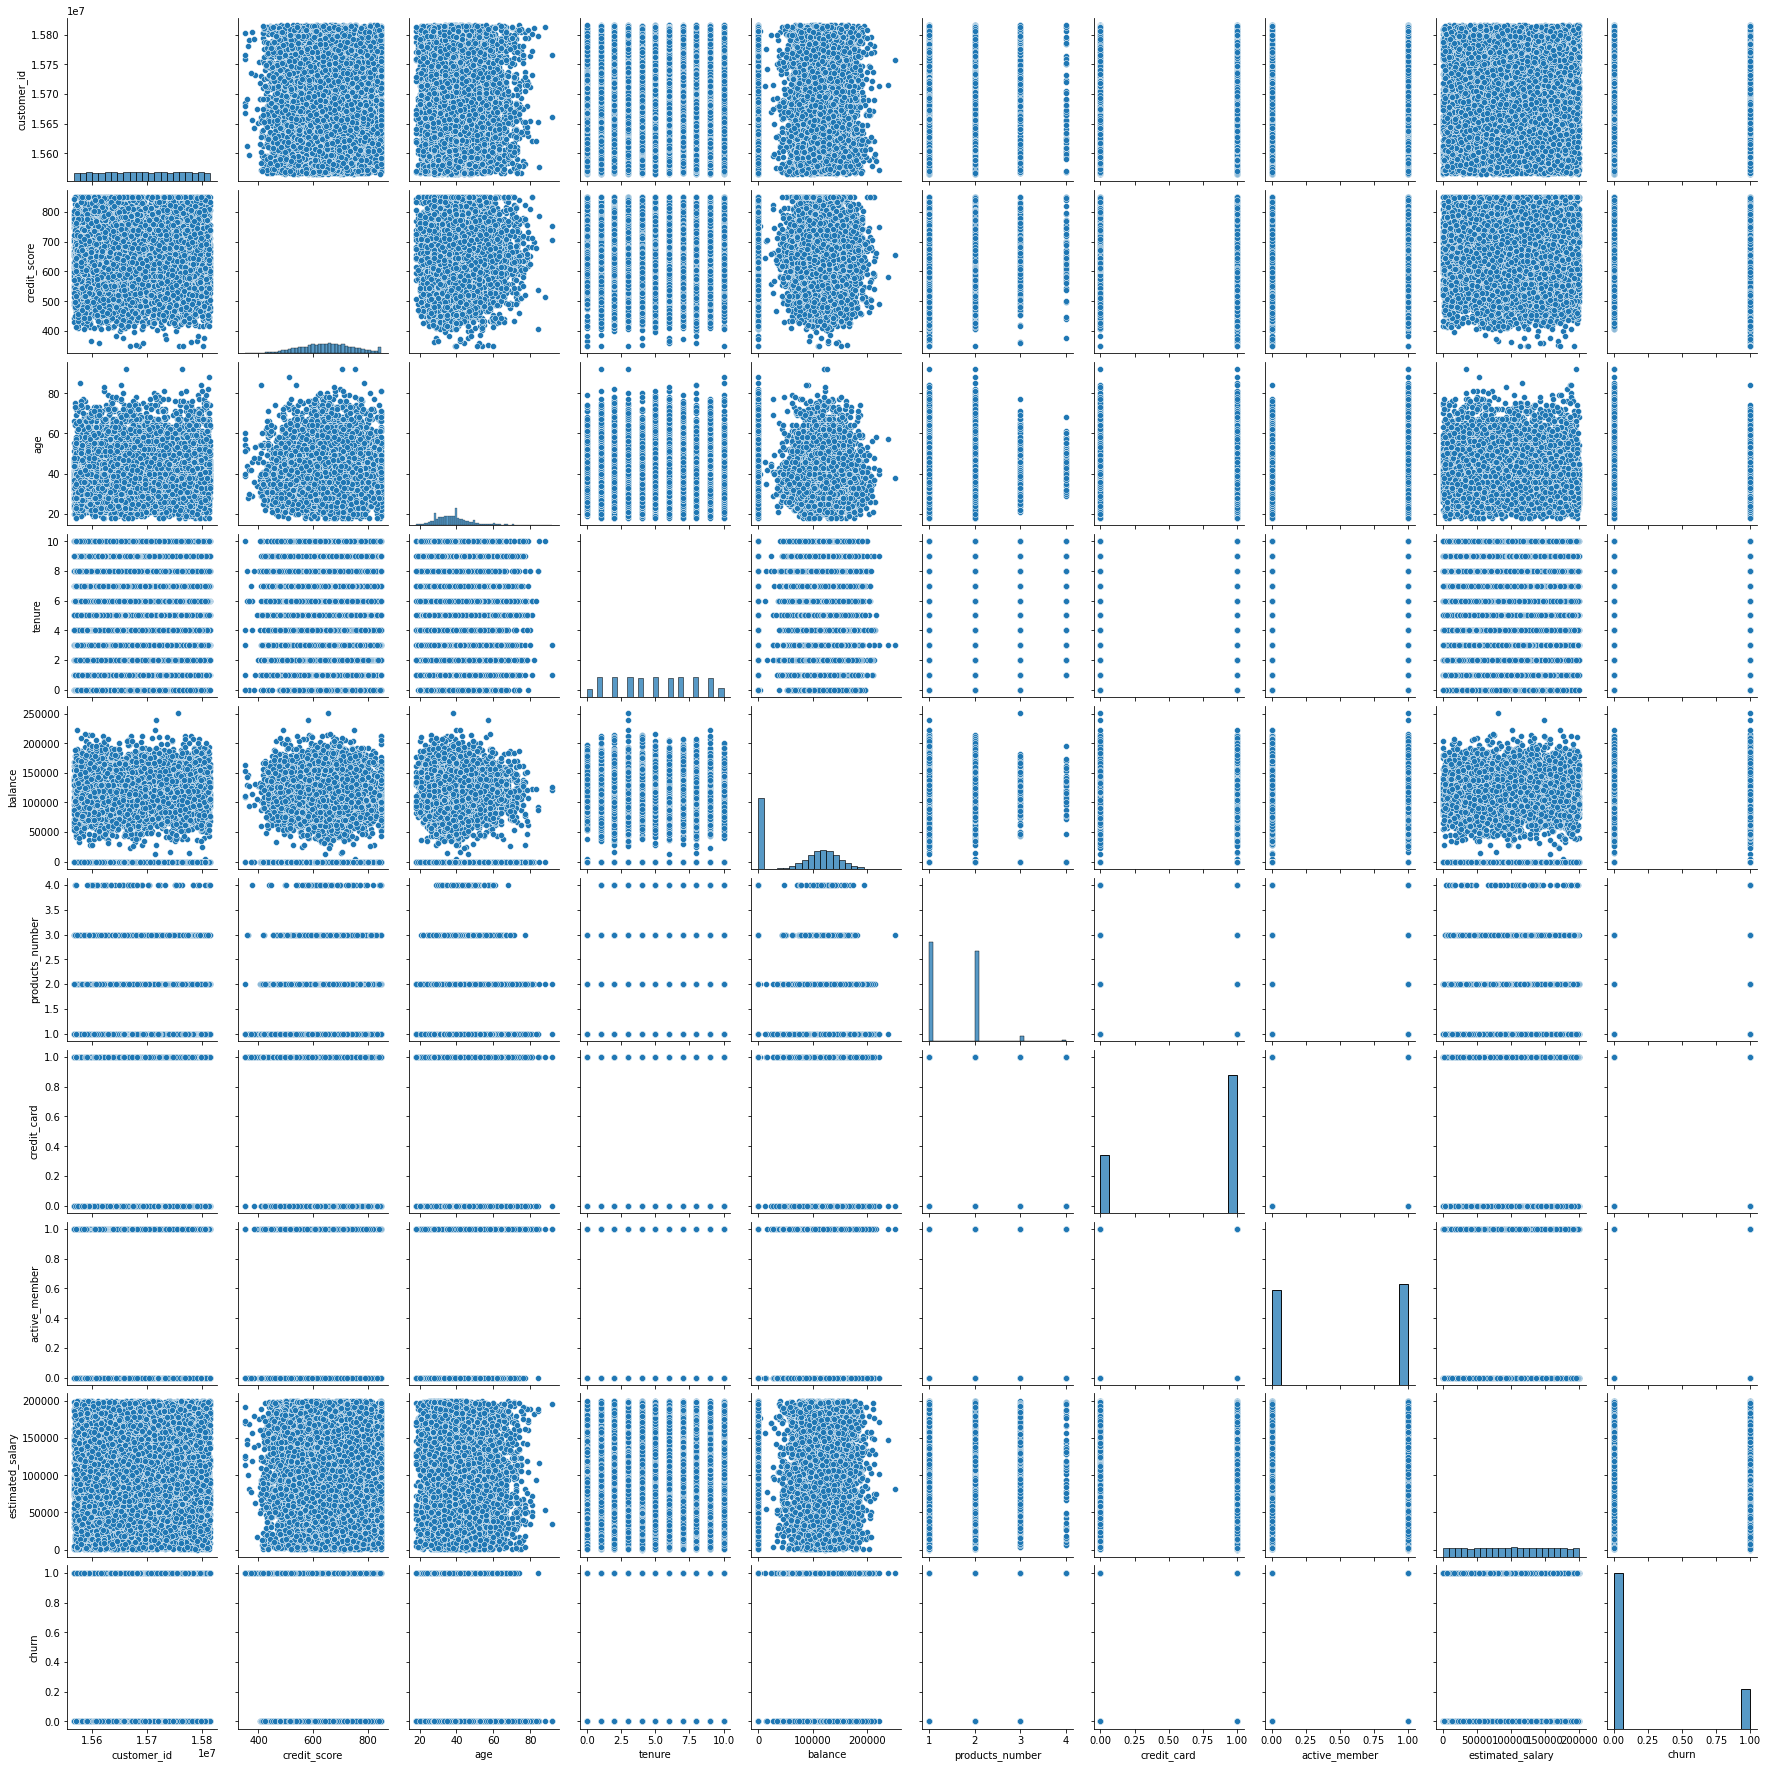

In [8]:
# Plot all the pairwise relationships
# Here, a pairplot usually offers no information about the strength of input variables because the data is generally
# encoded and/or because this is a classification task
# However, we can see that the data for the credit score and balance seem to be normally distributed
# Age seems to be bell shaped but skewed to the right
sns.pairplot(dataset)

In [9]:
# We can use the correlation_matrix to numerically confirm our observation
correlation_matrix = dataset.corr().round(2)
correlation_matrix

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.00,0.01,0.01,-0.01,-0.01,0.02,-0.01,0.00,0.02,-0.01
credit_score,0.01,1.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03
age,0.01,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
tenure,-0.01,0.00,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01
balance,-0.01,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12
products_number,0.02,0.01,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05
credit_card,-0.01,-0.01,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01,-0.01
active_member,0.00,0.03,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16
estimated_salary,0.02,-0.00,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01
churn,-0.01,-0.03,0.29,-0.01,0.12,-0.05,-0.01,-0.16,0.01,1.00


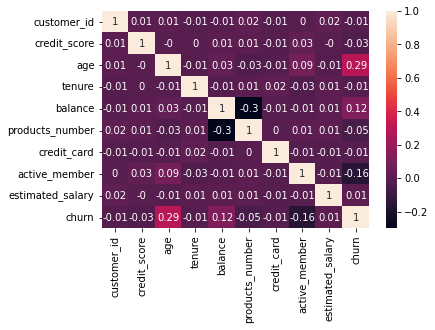

In [10]:
# Plot the heat map using the correlation matrix
sns.heatmap(data=correlation_matrix, annot=True)

In [11]:
# It is obvious that most of these attributes are not really correlated, which is good because we are doing a classification
# task and don't want to use data which is highly correlated

# Encode strings into number
# Country: France = 0, Germany = 1, Spain = 2
# Gender: Female = 0, Male = 1

dataset["country"] = dataset["country"].astype('category').cat.codes
dataset["gender"] = dataset["gender"].astype('category').cat.codes

In [12]:
dataset.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [22]:
# Get input attributes and target attribute
# customer_id is simply a descriptive identification number so we don't include it as an input attribute
# We don't want to standardize or normalize the data here for 2 reasons.
# 1) Standardization/Normalization will destroy important information because the each respective scale is necessary to 
# understand the data (ie. age has a different scale than balance but the scales are necessary as clearly, 52 in age
# is different than 52 in balance as 52000 in age is different than 52000 in balance)
# 2) Many of the input variables are encoded into numeric representations of categorical/boolean variables
# Standardization/normalization will offer no better model in these situations

feature_cols = ['credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']
X = dataset[feature_cols]
Y = dataset['churn']

In [14]:
# Split the X and Y into training and testing sets in a 80%:20% split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)


In [18]:
# DecisionTreeClassifier hyperparameter tuning
# Find the best parameters for the DecisionTreeClassifier
dtr_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('dt', DecisionTreeClassifier())])

# The parameters of the DecisionTreeClassifer to find the best of
parameters = [{'dt__max_depth': [3, 5, 7, 9],
         'dt__min_samples_leaf': [2, 3, 5]}]

# Use GridSearch to find best hyperparams
grid = GridSearchCV(dtr_pipe, param_grid=parameters, scoring="accuracy",cv=5)
grid.fit(X_train, Y_train)

# Print the best parameters and the score
print(grid.best_params_)
print(grid.score(X_train, Y_train))

{'dt__max_depth': 5, 'dt__min_samples_leaf': 3}
0.858125


In [19]:
# Create the DecisionTreeClassifier object with the best parameters
dtr = DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

# Train DecisionTreeClassifer on X_train and Y_train
dtr = dtr.fit(X_train,Y_train)

# Predict the response for test data
predictions = dtr.predict(X_test)
predicted_probs = dtr.predict_proba(X_test)

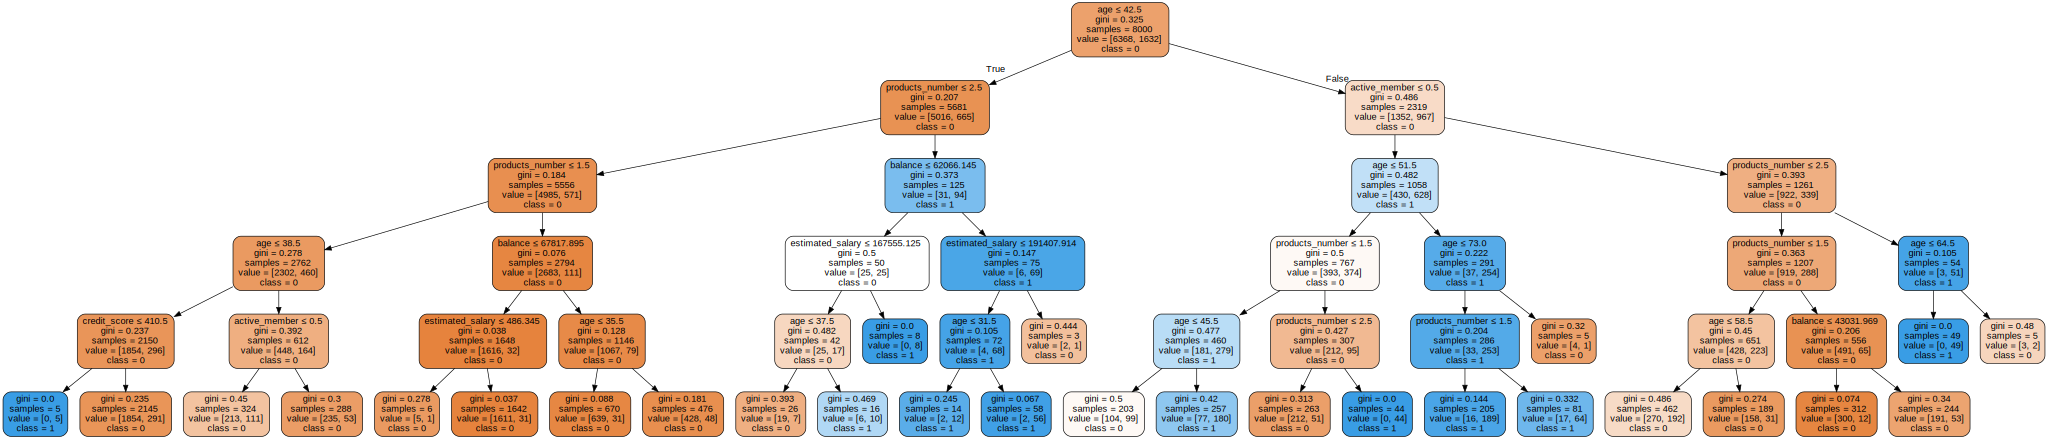

In [23]:
# Visualize the tree
dot_data = tree.export_graphviz(dtr, out_file=None, 
                     feature_names = feature_cols, class_names=['0','1'],
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [20]:
# Print the classification report with precision, recall, f1-score, and the number of values for each class
# Print the accuracy of the model on the test data
print('DecisionTreeClassifier Report\n', classification_report(Y_test, predictions))
print('DecisionTreeClassifier Accuracy: ', accuracy_score(Y_test, predictions))

DecisionTreeClassifier Report
               precision    recall  f1-score   support

           0       0.86      0.97      0.92      1595
           1       0.80      0.40      0.53       405

    accuracy                           0.86      2000
   macro avg       0.83      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000

DecisionTreeClassifier Accuracy:  0.8575


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


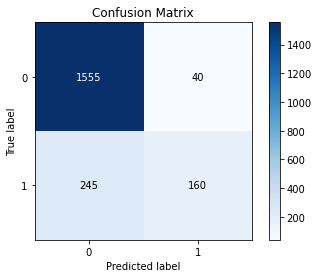

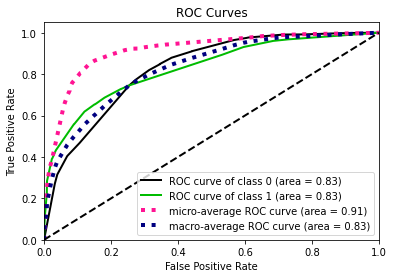

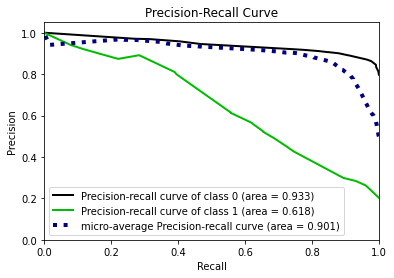

In [27]:
# Plot the confusion matrix, ROC curve, and the precision-recall curve
skplt.metrics.plot_confusion_matrix(Y_test, predictions)
skplt.metrics.plot_roc(Y_test, predicted_probs)
skplt.metrics.plot_precision_recall_curve(Y_test, predicted_probs)
plt.show()

In [31]:
# RandomForestClassifier hyperparameter tuning
# Find the best parameters for the RandomForestClassifier

# Create the RandomForestClassifier object
rdf = RandomForestClassifier()

# The parameters for the RandomForestClassifier to find the best of
parameters = {'n_estimators': [200, 500],
              'max_features': ['sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8]}

# Use GridSearch to find best hyperparams
grid = GridSearchCV(rdf, parameters, cv=5, scoring="accuracy")
grid.fit(X_train, Y_train)

print(grid.best_params_)
print(grid.best_estimator_)
print(grid.score(X_train, Y_train))

{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}
0.877375


In [37]:
# Create the RandomForestClassifier object with the best parameters
rdf = RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=500)

# Train RandomForestClassifier on X_train and Y_train
rdf = rdf.fit(X_train,Y_train)



# Predict the response for test data
predictions = rdf.predict(X_test)
predicted_probs = rdf.predict_proba(X_test)

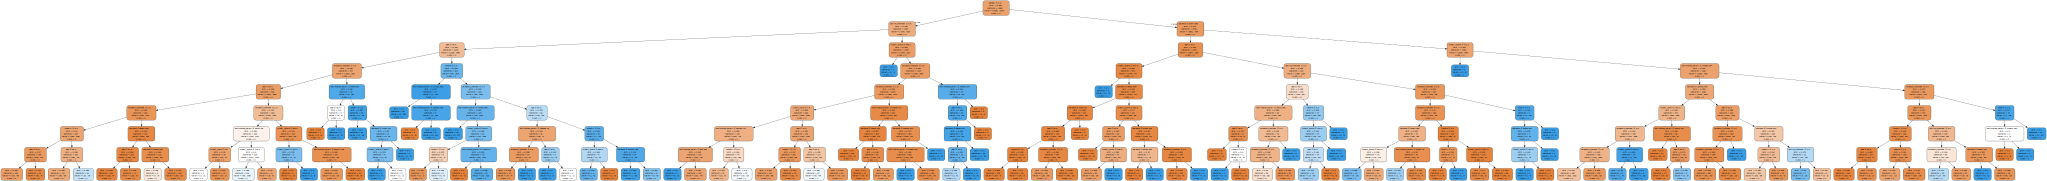

In [40]:
# Visualize a random tree from the forest
rand_num = random.randrange(0,rdf.n_estimators-1)
dot_data = tree.export_graphviz(rdf.estimators_[rand_num], out_file=None, 
                     feature_names = feature_cols, class_names=['0','1'],
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [41]:
# Print the classification report with precision, recall, f1-score, and the number of values for each class
# Print the accuracy of the model on the test data
print('DecisionTreeClassifier Report\n', classification_report(Y_test, predictions))
print('DecisionTreeClassifier Accuracy: ', accuracy_score(Y_test, predictions))

DecisionTreeClassifier Report
               precision    recall  f1-score   support

           0       0.86      0.97      0.92      1595
           1       0.78      0.40      0.53       405

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000

DecisionTreeClassifier Accuracy:  0.8565


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


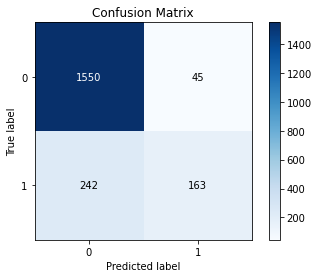

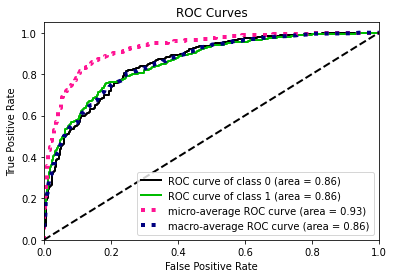

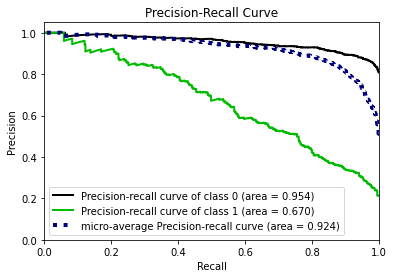

In [42]:
# Plot the confusion matrix, ROC curve, and the precision-recall curve
skplt.metrics.plot_confusion_matrix(Y_test, predictions)
skplt.metrics.plot_roc(Y_test, predicted_probs)
skplt.metrics.plot_precision_recall_curve(Y_test, predicted_probs)
plt.show()

In [ ]:
# Create the AdaBoostClassifier object
adb = AdaBoostClassifier()

# Train AdaBoostClassifier on X_train and Y_train
adb.fit(X_train, Y_train)

# Predict the response for test data
predictions = adb.predict(X_test)
predicted_probs = adb.predict_proba(X_test)

In [ ]:
print('AdaBoost Classication Report\n', classification_report(Y_test, predictions))
print('AdaBoost Accuracy: ', accuracy_score(Y_test, predictions))

In [ ]:
ypred = adb.predict(X_test)

mse = mean_squared_error(Y_test, ypred)
print("MSE: ", mse)

In [ ]:
# AdaBoost hyperparameter tuning
parameters = {
    'n_estimators':[10, 50, 100, 250, 500],
    'learning_rate':[0.0001, 0.001, 0.01, 0.1]
}

# Use GridSearch to find best hyperparams
grid = GridSearchCV(adb, param_grid=parameters, cv=5, n_jobs=-1)
grid.fit(X_train, Y_train)

print(grid.best_params_)
print(grid.best_estimator_)

In [ ]:
# Create the XGBClassifier object
xgb = xgb.XGBClassifier()

# Train XGBClassifier on X_train and Y_train
xgb.fit(X_train, Y_train)

# Predict the response for test data
predictions = xgb.predict(X_test)
predicted_probs = xgb.predict_proba(X_test)

In [ ]:
print('XGBoost Classification Report\n', classification_report(Y_test, predictions))
print('XGBoost Accuracy: ', accuracy_score(Y_test, predictions))

In [ ]:
ypred = xgb.predict(X_test)

mse = mean_squared_error(Y_test, ypred)
print("MSE: ", mse)

In [ ]:
# XGBoost hyperparameter tuning

parameters = {
    'max_depth': range(2, 10, 1),
    'n_estimators':[10, 50, 100, 250, 500],
    'learning_rate':[0.0001, 0.001, 0.01, 0.1]
}

# Use GridSearch to find best hyperparams
grid = GridSearchCV(xgb, param_grid=parameters, cv=5, n_jobs=-1)
grid.fit(X_train, Y_train)

print(grid.best_params_)
print(grid.best_estimator_)
